# BINARY GENETIC ALGORITHM

0 ve 1'lerden oluşan parolanın Genetik Algoritma yöntemi ile tespit edilmesine yönelik oluşturulmuş basit bir algoritmadır. Turnuva Seçimi ile tek noktadan çaprazlama yöntemleri kullanılmıştır.

In [126]:
# ************  Kütüphanelerin Yüklenmesi  ************ #

import random
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# ************  Genetik Algoritmanın Yapısı  ************ #

def create_password(gene):
    
    # Ulaşılmak istenen parolanın oluşturulması
    number_of_ones = int(gene / 2)
    password = np.zeros(gene)
    password[0: number_of_ones] = 1
    np.random.shuffle(password)
    
    return password


def create_population(chromosome, gene):

    # Başlangıç Popülanyonunun oluşturulması
    population = np.zeros((chromosome, gene))

    for i in range(chromosome):
        ones = random.randint(0, gene)
        population[i, 0:ones] = 1
        np.random.shuffle(population[i])
    
    return population


def fitness(password, population):

    # Doğru eşleşen değerlerin tespiti
    identical_to_password = population == password
    fitness_scores = identical_to_password.sum(axis=1)
    
    return fitness_scores


def selection(population, scores):

    # Turnuva Seçimi Metodu ile fitness değeri yüksek bireylerin seçilmesi
    population_size = len(scores)
    
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    return population[winner, :]


def crossingover(parent_1, parent_2):
    
    # Ebeveynlerden yeni bireylerin oluşturulması
    gene = len(parent_1)
    
    crossover_point = random.randint(1,gene-1)
    
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    return child_1, child_2
    

def mutation(population, mutation_probability):
    
    # Yeni bireylerde Mutasyon ile çeşitliliğin arttırılması
    random_mutation_array = np.random.random(
        size=(population.shape))
        
    random_mutation_boolean = \
        random_mutation_array <= mutation_probability

    population[random_mutation_boolean] = \
    np.logical_not(population[random_mutation_boolean])
        
    return population

In [128]:
# ************  Ana Bölüm  ************ #

# Genel Parametreler
gene = 40
population_size = 50
maximum_generation = 200
mutation_probability = 0.01
best_score_progress = []

# Parola Oluştur
password = create_password(gene)

# Başlangıç Popülasyonu
population = create_population(population_size, gene)

# İlk popülasyonun skorunu göster.
scores = fitness(password, population)
best_score = np.max(scores)/gene * 100
print ('Başlangıç Skoru: ',best_score)

# En iyi skorların tablosu
best_score_progress.append(best_score)

# İterasyonu max_generation kadar tekrarla
for generation in range(maximum_generation):

    new_population = []
    
    # Ebeveynlerden çaprazlama ile yeni genler elde et
    for i in range(int(population_size/2)):
        parent_1 = selection(population, scores)
        parent_2 = selection(population, scores)
        child_1, child_2 = crossingover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Yeni bireylerin mutasyonu
    population = np.array(new_population)
    population = mutation(population, mutation_probability)
    
    # Skorları hesapla ve skor tablosu oluştur
    scores = fitness(password, population)
    best_score = np.max(scores)/gene * 100
    best_score_progress.append(best_score)

# Son skoru yazdır.
print ('En İyi Skor: ', best_score)


Başlangıç Skoru:  62.5
En İyi Skor:  100.0


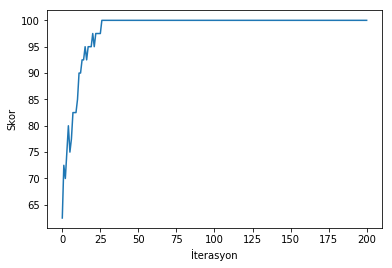

In [129]:
# ************  Skorların Çizdirilmesi  ************ # 

plt.plot(best_score_progress)
plt.xlabel('İterasyon')
plt.ylabel('Skor')
plt.show()